In [34]:
import pandas as pd
import numpy as np
import country_converter as coco
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
import nltk
import country_converter as coco
import plotly.graph_objects as go
import pycountry
from IPython.display import Image
%matplotlib inline

In [35]:
df = pd.read_csv('ds_salaries.csv')
df.drop(df[['salary','salary_currency']], axis = 1, inplace = True)


In [36]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M


In [37]:
df.tail()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3750,2020,SE,FT,Data Scientist,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,US,100,US,L
3754,2021,SE,FT,Data Science Manager,94665,IN,50,IN,L


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary_in_usd       3755 non-null   int64 
 5   employee_residence  3755 non-null   object
 6   remote_ratio        3755 non-null   int64 
 7   company_location    3755 non-null   object
 8   company_size        3755 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.1+ KB


In [39]:
missing_values = df.isnull().sum()
print(missing_values)

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


There are no null values luckily

In [40]:
df.describe()

,work_year,salary_in_usd,remote_ratio
count,3755.000000,3755.000000,3755.000000
mean,2022.373635,137570.389880,46.271638
std,0.691448,63055.625278,48.589050
min,2020.000000,5132.000000,0.000000
25%,2022.000000,95000.000000,0.000000
50%,2022.000000,135000.000000,0.000000
75%,2023.000000,175000.000000,100.000000
max,2023.000000,450000.000000,100.000000


In [41]:
print("NUMBER OF UNIQUE VALUES:\n")
print(df.nunique())

NUMBER OF UNIQUE VALUES:

work_year                4
experience_level         4
employment_type          4
job_title               93
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64


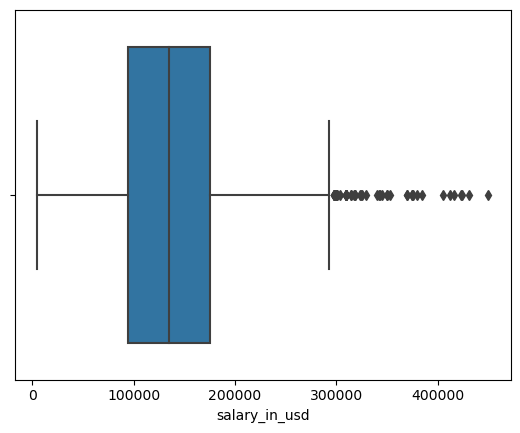

In [42]:
# Assuming df is your DataFrame and 'salaryinusd' is your column of interest
sns.boxplot(x=df['salary_in_usd'])
plt.show()

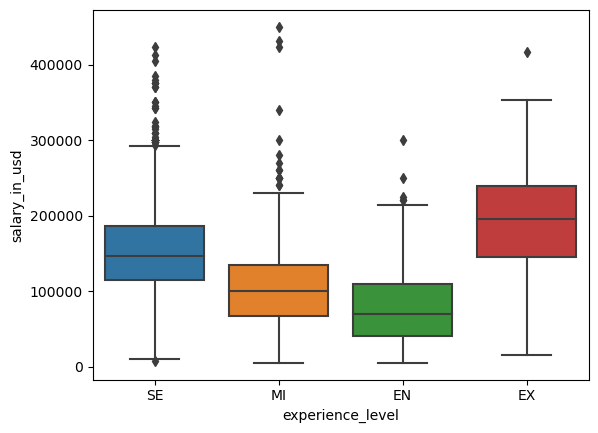

In [43]:
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.show()

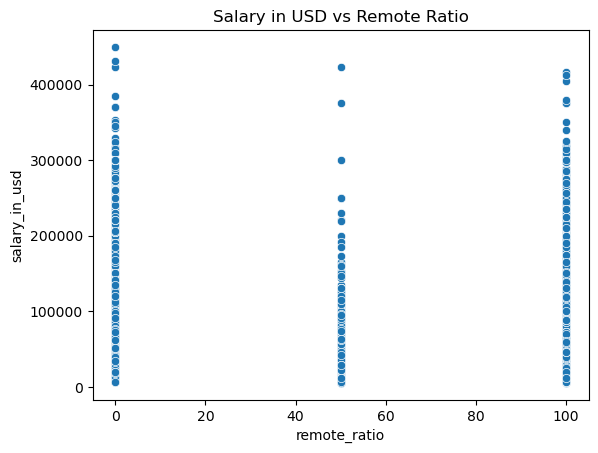

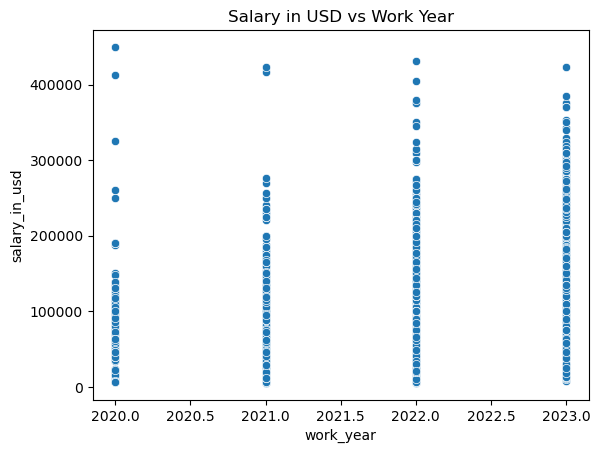

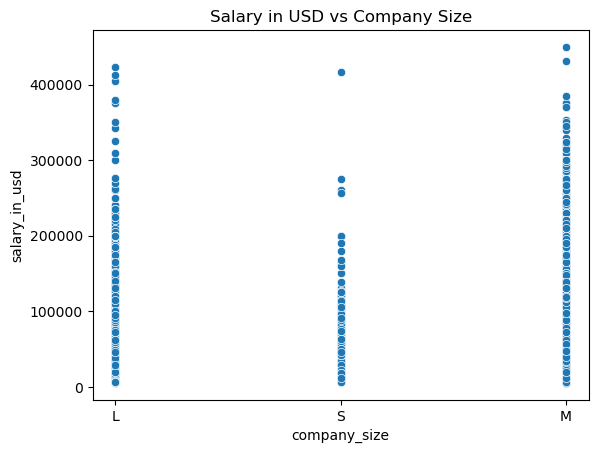

In [11]:
# For 'remote_ratio'
sns.scatterplot(x='remote_ratio', y='salary_in_usd', data=df)
plt.title("Salary in USD vs Remote Ratio")
plt.show()

# For 'work_year'
sns.scatterplot(x='work_year', y='salary_in_usd', data=df)
plt.title("Salary in USD vs Work Year")
plt.show()

# For 'company_size'
sns.scatterplot(x='company_size', y='salary_in_usd', data=df)
plt.title("Salary in USD vs Company Size")
plt.show()

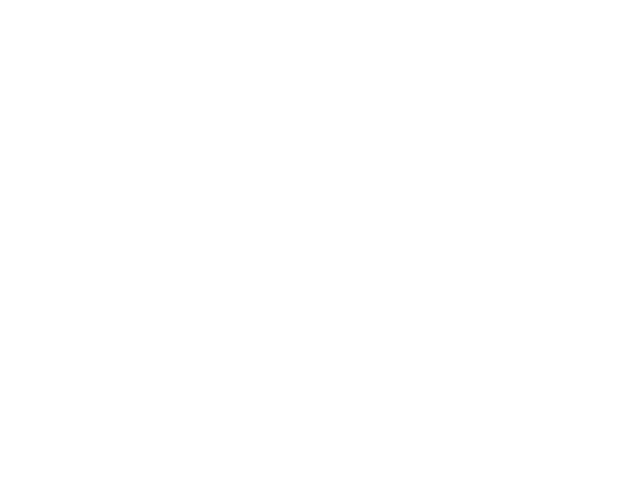

<Figure size 640x480 with 0 Axes>

In [33]:
df['experience_level'] = df['experience_level'].replace('EN','Entry-level/Junior')
df['experience_level'] = df['experience_level'].replace('MI','Mid-level/Intermediate')
df['experience_level'] = df['experience_level'].replace('SE','Senior-level/Expert')
df['experience_level'] = df['experience_level'].replace('EX','Executive-level/Director')

ex_level = df['experience_level'].value_counts()
fig = px.treemap(ex_level, path = [ex_level.index], values = ex_level.values, 
                title = 'Experience Level')
fig.show()
plt.savefig('exp_breakdown.png')
Image(filename='exp_breakdown.png') 

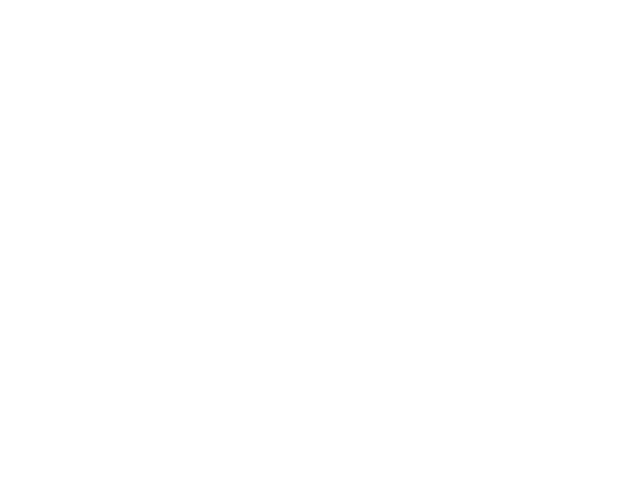

<Figure size 640x480 with 0 Axes>

In [44]:
top15_job_titles = df['job_title'].value_counts()[:15]
fig = px.bar(y = top15_job_titles.values, x = top15_job_titles.index, 
            text = top15_job_titles.values, title = 'Top 15 Job Titles')
fig.update_layout(xaxis_title = "Job Titles", yaxis_title = "Count")
fig.show()
plt.savefig('top_15_jobs.png')
Image(filename='top_15_jobs.png') 

In [14]:
group = df['employment_type'].value_counts()
emp_type = ['Full-Time', 'Part-Time', 'Contract', 'Freelance']

fig = px.bar(x = emp_type, y = group.values, 
       color = group.index, text = group.values, 
       title = 'Employment Type Distribution')

fig.update_layout( xaxis_title = "Employment Type", yaxis_title = "count")
fig.show()

In [15]:
# Convert country names to ISO3 format
df['employee_residence'] = coco.convert(names = df['employee_residence'], to = "ISO3")

# Count the frequency of each country
residence = df['employee_residence'].value_counts().reset_index()

# Rename the columns for better clarity
residence.columns = ['country', 'count']

# Create a choropleth map
fig = px.choropleth(residence, 
                    locations = 'country',
                    color = 'count',
                    hover_name = 'country', # add hover name
                    color_continuous_scale = px.colors.sequential.Plasma, # change color scale
                    title = 'Employee Location On Map')

fig.show()


In [16]:
# Count the number of employees in each location
residence_counts = df['employee_residence'].value_counts()

# Select the top 15 locations
top_15_emp_locations = residence_counts[:15].reset_index()

# Rename the columns for clarity
top_15_emp_locations.columns = ['country', 'count']

# Generate the bar plot
fig = px.bar(top_15_emp_locations,
             y = 'count',
             x = 'country',
             color = 'country', # colors the bars based on country
             text = 'count',    # displays the count on each bar
             title = 'Top 15 Locations of Employees')

fig.update_layout(xaxis_title = "Location of Employees",
                  yaxis_title = "Count")

fig.show()


In [17]:
group = df['company_size'].value_counts()

fig = px.bar(y = group.values, x = group.index, 
             color = group.index, text = group.values,
             title = 'Distribution of Company Size')

fig.update_layout(xaxis_title = "Company Size", yaxis_title = "count")
fig.show()

In [18]:
work_year = df['work_year'].value_counts()
fig = px.pie(values = work_year.values, names = work_year.index, 
            title = 'Work year distribution')
fig.show()

In [19]:
hist_data = [df['salary_in_usd']]
group_labels = ['salary_in_usd']

fig = ff.create_distplot(hist_data, group_labels, show_hist = False)
fig.update_layout(title = 'Distribution Plot of Salary in USD') 
fig.show()

In [20]:
remote_type = ['Fully Remote', 'Partially Remote', 'No Remote Work']

fig = px.bar(x = remote_type, y = df['remote_ratio'].value_counts().values,
       color = remote_type, text = df['remote_ratio'].value_counts().values,
       title = 'Remote Ratio Distribution')

fig.update_layout( xaxis_title = "Remote Type", yaxis_title = "count")
fig.show()

In [21]:
exp_type = df.groupby(['experience_level','employment_type']).size()

fig = go.Figure(data = [
    go.Bar(name = 'Entry-level/Junior', x = exp_type['Entry-level/Junior'].index, 
           y = exp_type['Entry-level/Junior'].values, text = exp_type['Entry-level/Junior'].values),
    go.Bar(name = 'Executive-level/Director', x = exp_type['Executive-level/Director'].index, 
           y = exp_type['Executive-level/Director'].values, text = exp_type['Executive-level/Director'].values),
    go.Bar(name = 'Mid-level/Intermediate', x = exp_type['Mid-level/Intermediate'].index,
           y = exp_type['Mid-level/Intermediate'].values, text = exp_type['Mid-level/Intermediate'].values),
    go.Bar(name = 'Senior-level/Expert', x = exp_type['Senior-level/Expert'].index,
           y = exp_type['Senior-level/Expert'].values, text = exp_type['Senior-level/Expert'].values)])

fig.update_layout(xaxis_tickangle = -45, title = 'Experiece Level along with Employment Type')

fig.show()


In [22]:
exp_job = df.groupby(['experience_level','job_title']).size()

entry_top5 = exp_job['Entry-level/Junior'].sort_values(ascending = False)[:5]
executive_top5 = exp_job['Executive-level/Director'].sort_values(ascending = False)[:5]
mid_top5 = exp_job['Mid-level/Intermediate'].sort_values(ascending = False)[:5]
senior_top5 = exp_job['Senior-level/Expert'].sort_values(ascending = False)[:5]

exp_type = df.groupby(['experience_level','employment_type']).size()

fig = go.Figure(data=[
    go.Bar(name = 'Entry-level/Junior', x = entry_top5.index, 
           y=entry_top5.values, text = entry_top5.values),
    go.Bar(name = 'Executive-level/Director', x = executive_top5.index,
           y = executive_top5.values, text = executive_top5.values),
    go.Bar(name = 'Mid-level/Intermediate', x = mid_top5.index,
           y = mid_top5.values, text = mid_top5.values ),
    go.Bar(name = 'Senior-level/Expert', x = senior_top5.index,
           y = senior_top5.values, text = senior_top5.values)])

fig.update_layout(xaxis_tickangle = -45, title = 'Experiece Level with top 5 job designations')
fig.show()

In [26]:
size_by_company = df.groupby('company_size').size()
exp_size = df.groupby(['experience_level', 'company_size']).size()
exp_size_ratio = exp_size.divide(size_by_company, level='company_size')

fig = go.Figure(data=[
    go.Bar(name='Entry-level/Junior', x=exp_size_ratio['Entry-level/Junior'].index, 
           y=exp_size_ratio['Entry-level/Junior'].values, text=exp_size_ratio['Entry-level/Junior'].values),
    go.Bar(name='Executive-level/Director', x=exp_size_ratio['Executive-level/Director'].index, 
           y=exp_size_ratio['Executive-level/Director'].values, text=exp_size_ratio['Executive-level/Director'].values),
    go.Bar(name='Mid-level/Intermediate', x=exp_size_ratio['Mid-level/Intermediate'].index, 
           y=exp_size_ratio['Mid-level/Intermediate'].values, text=exp_size_ratio['Mid-level/Intermediate'].values),
    go.Bar(name='Senior-level/Expert', x=exp_size_ratio['Senior-level/Expert'].index, 
           y=exp_size_ratio['Senior-level/Expert'].values, text=exp_size_ratio['Senior-level/Expert'].values),
])
fig.update_layout(xaxis_tickangle=0, title='Experience Level Ratio within Each Company Size')

fig.show()


In [27]:
work_2020 = df.loc[(df['work_year'] == 2020)]
work_2021 = df.loc[(df['work_year'] == 2021)]
work_2022 = df.loc[(df['work_year'] == 2022)]
work_2023 = df.loc[(df['work_year'] == 2023)]
 
hist_data = [work_2020['salary_in_usd'], work_2021['salary_in_usd'], 
            work_2022['salary_in_usd'], work_2023['salary_in_usd']]
group_labels = ['2020 salary', '2021 salary', '2022 salary', '2023 salary']

year_salary = pd.DataFrame(columns = ['2020', '2021', '2022', '2023'])
year_salary['2020'] = work_2020.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
year_salary['2021'] = work_2021.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
year_salary['2022'] = work_2022.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
year_salary['2023'] = work_2023.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values

fig1 = ff.create_distplot(hist_data, group_labels, show_hist = False)
fig2 = go.Figure(data=px.bar(x = year_salary.columns, 
                            y = year_salary.values.tolist()[0],
                            color = year_salary.columns,
                            title = 'Mean Salary by Work Year'))

fig1.update_layout(title = 'Salary Distribution based on Work Year')
fig2.update_layout(xaxis_title = "Work Year", yaxis_title = "Mean Salary (k)")
fig1.show()
fig2.show()

In [28]:
exp_salary = df[['experience_level','salary_in_usd']]

entry_salary = exp_salary.loc[exp_salary['experience_level'] == 'Entry-level/Junior']
executive_salary = exp_salary.loc[exp_salary['experience_level'] == 'Executive-level/Director']
mid_salary = exp_salary.loc[exp_salary['experience_level'] == 'Mid-level/Intermediate']
senior_salary = exp_salary.loc[exp_salary['experience_level'] == 'Senior-level/Expert']

hist_data = [entry_salary['salary_in_usd'], mid_salary['salary_in_usd'], senior_salary['salary_in_usd'], executive_salary['salary_in_usd']]
group_labels = ['Entry-level/Junior', 'Mid-level/Intermediate', 'Senior-level/Expert', 'Executive-level/Director']

means = [entry_salary['salary_in_usd'].mean(), mid_salary['salary_in_usd'].mean(),
    senior_salary['salary_in_usd'].mean(), executive_salary['salary_in_usd'].mean(),]

fig1 = ff.create_distplot(hist_data, group_labels, show_hist = False)
fig2 = go.Figure(data=px.bar(x = group_labels, y = means, color = group_labels,
                            title = 'Mean Salary by Experience Level'))
                            
fig1.update_layout(title = 'Salary Distribution based on Experience')
fig2.update_layout(xaxis_title = "Experience Level", yaxis_title = "Mean Salary (k) ")
fig1.show()
fig2.show()

In [29]:
company_size = df[['company_size','salary_in_usd']]
small = exp_salary.loc[company_size['company_size'] == 'S']
mid = exp_salary.loc[company_size['company_size'] == 'M']
large = exp_salary.loc[company_size['company_size'] == 'L']
hist_data = [small['salary_in_usd'], mid['salary_in_usd'], large['salary_in_usd']]
group_labels = ['Company Size: Small', 'Company Size: Mid', 'Company Size: Large']

means = [small['salary_in_usd'].mean(), mid['salary_in_usd'].mean(), large['salary_in_usd'].mean()]

fig1 = ff.create_distplot(hist_data, group_labels, show_hist = False)
fig2 = go.Figure(data = px.bar(x = group_labels, y = means, color = group_labels,
                title = 'Mean Salary by Company Size'))

fig1.update_layout(title = 'Salary Distribution based onk Company Size')
fig2.update_layout( xaxis_title = "Company Size", yaxis_title = "Mean Salary (k)")
fig1.show()
fig2.show()

In [30]:
salary_designation = df.groupby(['salary_in_usd', 'job_title']).size().reset_index()
salary_designation = salary_designation[-25:]
fig = px.bar(x = salary_designation['job_title'], y = salary_designation['salary_in_usd'],
            text = salary_designation['salary_in_usd'], color = salary_designation['salary_in_usd'])

fig.update_layout( xaxis_title = "Job Designation", yaxis_title = "Salaries ")
fig.update_layout(xaxis_tickangle = -45, 
                  title = 'Top 25 Highest Salary by Designation')

In [32]:

# Convert Alpha-2 codes to Alpha-3
def alpha2_to_alpha3(alpha_2):
    return pycountry.countries.get(alpha_2=alpha_2).alpha_3

# Apply the conversion function to company_location
salary_location = df[['company_location', 'salary_in_usd']].copy()
salary_location['company_location'] = salary_location['company_location'].apply(alpha2_to_alpha3)

# Generate the choropleth map
fig = go.Figure(data=go.Choropleth(
    locations = salary_location['company_location'],
    z = salary_location['salary_in_usd'],
    text = salary_location['company_location'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Salary in USD',
))

fig.update_layout(
    title_text='Average Salary by Company Location',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show()
